# Final notebook 05.1 LA Neighborhood Transit: Spatial Statistics Overview

**By:** Andrew Williams and Ben Brassette

**Decription:** Purpose of this notebook is to use the tools from the Week 08 Spatial Stats lesson in order to provide a better analysis of our chosen neighborhoods for this project. 

**Neighborhoods:**
* Downtown (Central LA)
* Pico-Union(Central LA)
* Panaroma City (San Fernando Valley)
* North Hollywood (San Fernando Valley)
* Mid-City (Central LA, Car Dominant)

# Library 

In [5]:
# to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

# Trimming Data

## Data Check

I'm going to downloand my dataset that features mode of transportatotion to work. I'm using a dataset that also has neighborhoods, income, and racial breakdownn in case I need to explore other variables (time permitting). I will do a typical check of the data to make sure it's ready for some exploration. 

In [6]:
gdf= gpd.read_file('data/m2w_income_race_new.geojson')

In [7]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [8]:
gdf.shape

(1004, 37)

In [9]:
gdf. head(4)

geoid                                   name Neighborho  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA    Tujunga   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA    Tujunga   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA    Tujunga   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA    Tujunga   

   Median Inc  Total Work  Car Total  Drove alon  Carpooled  Public tra   Bus  \
0     63534.0      2027.0     1860.0      1656.0      204.0        59.0  36.0   
1     90389.0      1834.0     1730.0      1617.0      113.0         9.0   0.0   
2     44083.0      3057.0     2699.0      2430.0      269.0        68.0  68.0   
3     43713.0      1593.0     1439.0      1323.0      116.0        48.0  48.0   

   ...  N_Asian  N_Native H  Hispanic o  %N_White  %N_Black  %N_Native  \
0  ...    331.0         3.0      1188.0     61.08      0.44       0.07   
1  ...    220.0         0.0       147.0     84.64      2.17       0.44   
2  ...    486.0         0.0      2616.0     47.05      3.12       0.00   
3  ...    341.0         0.0      1364.0     48.95      2.35       0.00   

   %N_Asian  %N_Hawaiia  %Hispanic  \
0      7.73        0.07      27.74   
1      6.46        0.00       4.32   
2      7.66        0.00      41.22   
3      9.21        0.00      36.84   

                                            geometry  
0  POLYGON ((-118.30229 34.25870, -118.30091 34.2...  
1  POLYGON ((-118.30334 34.27371, -118.30330 34.2...  
2  POLYGON ((-118.29945 34.25598, -118.29792 34.2...  
3  POLYGON ((-118.28593 34.25227, -118.28592 34.2...  

[4 rows x 37 columns]

In [10]:
gdf.tail(4)

geoid                                   name  \
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   

           Neighborho  Median Inc  Total Work  Car Total  Drove alon  \
1000          Tujunga         NaN         5.0        5.0         5.0   
1001      Westchester         NaN         0.0        0.0         0.0   
1002        San Pedro         NaN        24.0       15.0        15.0   
1003  No Neighborhood         NaN         0.0        0.0         0.0   

      Carpooled  Public tra  Bus  ...  N_Asian  N_Native H  Hispanic o  \
1000        0.0         0.0  0.0  ...      0.0         0.0         7.0   
1001        0.0         0.0  0.0  ...      0.0         0.0         0.0   
1002        0.0         0.0  0.0  ...     36.0        24.0       387.0   
1003        0.0         0.0  0.0  ...      0.0         0.0         0.0   

      %N_White  %N_Black  %N_Native  %N_Asian  %N_Hawaiia  %Hispanic  \
1000     26.92     42.31       0.00      0.00        0.00      26.92   
1001       NaN       NaN        NaN       NaN         NaN        NaN   
1002     33.45     19.74       2.21      3.06        2.04      32.94   
1003       NaN       NaN        NaN       NaN         NaN        NaN   

                                               geometry  
1000  POLYGON ((-118.35173 34.28034, -118.35173 34.2...  
1001  POLYGON ((-118.45246 33.94315, -118.44644 33.9...  
1002  POLYGON ((-118.29105 33.75378, -118.29050 33.7...  
1003  POLYGON ((-118.63598 34.03255, -118.63259 34.0...  

[4 rows x 37 columns]

I'll need to rename my columns

In [11]:
gdf.columns.to_list()

['geoid',
 'name',
 'Neighborho',
 'Median Inc',
 'Total Work',
 'Car Total',
 'Drove alon',
 'Carpooled',
 'Public tra',
 'Bus',
 'Subway or',
 'Long-dista',
 'Light rail',
 'Worked fro',
 '%Car Total',
 '%Drove alo',
 '%Carpooled',
 '%Public tr',
 '%Bus',
 '%Subway or',
 '%Long-dist',
 '%Light rai',
 '%Worked fr',
 'Total Pop',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native H',
 'Hispanic o',
 '%N_White',
 '%N_Black',
 '%N_Native',
 '%N_Asian',
 '%N_Hawaiia',
 '%Hispanic',
 'geometry']

In [12]:
gdf.columns=['Geoid',
 'Name',
 'Neighborhood',
 'Median Inc',
 'Total Work',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway',
 'Long-distance rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway',
 '%Long-distance rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop',
 'White',
 'Black',
 'Native',
 'Asian',
 'Native H',
 'Hispanic or Latino',
 '%White',
 '%Black',
 '%Native',
 '%Asian',
 '%Hawaiian',
 '%Hispanic or Latino',
 'geometry']

In [13]:
gdf.head(3)

Geoid                                   Name Neighborhood  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA      Tujunga   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA      Tujunga   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA      Tujunga   

   Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
0     63534.0      2027.0     1860.0       1656.0      204.0   
1     90389.0      1834.0     1730.0       1617.0      113.0   
2     44083.0      3057.0     2699.0       2430.0      269.0   

   Public transportation   Bus  ...  Asian  Native H  Hispanic or Latino  \
0                   59.0  36.0  ...  331.0       3.0              1188.0   
1                    9.0   0.0  ...  220.0       0.0               147.0   
2                   68.0  68.0  ...  486.0       0.0              2616.0   

   %White  %Black  %Native  %Asian  %Hawaiian  %Hispanic or Latino  \
0   61.08    0.44     0.07    7.73       0.07                27.74   
1   84.64    2.17     0.44    6.46       0.00                 4.32   
2   47.05    3.12     0.00    7.66       0.00                41.22   

                                            geometry  
0  POLYGON ((-118.30229 34.25870, -118.30091 34.2...  
1  POLYGON ((-118.30334 34.27371, -118.30330 34.2...  
2  POLYGON ((-118.29945 34.25598, -118.29792 34.2...  

[3 rows x 37 columns]

All is right with the world and the dataset is good to go!

# Normalizing: Our Data per 1000 people

Following the example from class, I'm normalizing a couple variables to see the rate per 1000 people

In [14]:
gdf['car_per_1000'] = gdf['Car Total']/gdf['Total Work']*1000
gdf['transit_per_1000'] = gdf['Public transportation']/gdf['Total Work']*1000
gdf['bus_per_1000'] = gdf['Bus']/gdf['Total Work']*1000
gdf['subway_per_1000'] = gdf['Subway']/gdf['Total Work']*1000
gdf['disrail_per_1000'] = gdf['Long-distance rail']/gdf['Total Work']*1000
gdf['lightrail_per_1000'] = gdf['Worked from home']/gdf['Total Work']*1000

Well we use all of these, no. Likely just car and transporation. But it's nice to have options.

In [15]:
gdf.sample(3)

Geoid                                   Name  \
454  14000US06037192700     Census Tract 1927, Los Angeles, CA   
181  14000US06037123420  Census Tract 1234.20, Los Angeles, CA   
23   14000US06037104320  Census Tract 1043.20, Los Angeles, CA   

       Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
454  East Hollywood     52603.0      1796.0     1240.0       1148.0   
181     Valley Glen     44790.0      2136.0     1903.0       1738.0   
23          Pacoima     56021.0      2511.0     2231.0       1817.0   

     Carpooled  Public transportation    Bus  ...  %Asian  %Hawaiian  \
454       92.0                  447.0  402.0  ...   18.44        0.0   
181      165.0                  103.0   96.0  ...    6.37        0.0   
23       414.0                   80.0   80.0  ...    1.10        0.0   

     %Hispanic or Latino                                           geometry  \
454                62.22  POLYGON ((-118.29171 34.08359, -118.29051 34.0...   
181                54.40  POLYGON ((-118.42236 34.19394, -118.42143 34.1...   
23                 89.15  POLYGON ((-118.42876 34.27236, -118.42854 34.2...   

     car_per_1000  transit_per_1000  bus_per_1000  subway_per_1000  \
454    690.423163        248.886414    223.830735        25.055679   
181    890.917603         48.220974     44.943820         3.277154   
23     888.490641         31.859817     31.859817         0.000000   

     disrail_per_1000  lightrail_per_1000  
454               0.0           46.770601  
181               0.0           46.816479  
23                0.0            5.575468  

[3 rows x 43 columns]

Also note, I should really stops adding space to my variables. 

In [16]:
gdf.sort_values(by="transit_per_1000").tail(10)

Geoid                                   Name  \
563   14000US06037209102  Census Tract 2091.02, Los Angeles, CA   
536   14000US06037206300     Census Tract 2063, Los Angeles, CA   
562   14000US06037208904  Census Tract 2089.04, Los Angeles, CA   
560   14000US06037208902  Census Tract 2089.02, Los Angeles, CA   
569   14000US06037209402  Census Tract 2094.02, Los Angeles, CA   
995   14000US06037980020  Census Tract 9800.20, Los Angeles, CA   
997   14000US06037980022  Census Tract 9800.22, Los Angeles, CA   
998   14000US06037980023  Census Tract 9800.23, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   

              Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
563               Westlake     29190.0      2995.0     1148.0       1071.0   
536               Downtown      9191.0       850.0      131.0        100.0   
562               Westlake     27250.0      1996.0      467.0        363.0   
560               Westlake     34568.0      1478.0      379.0        243.0   
569               Westlake     32879.0      2219.0      453.0        226.0   
995           Shadow Hills         NaN         0.0        0.0          0.0   
997          Granada Hills         NaN         0.0        0.0          0.0   
998   Chatsworth Reservoir         NaN         0.0        0.0          0.0   
1001           Westchester         NaN         0.0        0.0          0.0   
1003       No Neighborhood         NaN         0.0        0.0          0.0   

      Carpooled  Public transportation     Bus  ...  %Asian  %Hawaiian  \
563        77.0                 1551.0  1488.0  ...   12.39        0.0   
536        31.0                  447.0   447.0  ...    2.21        0.2   
562       104.0                 1136.0  1125.0  ...    7.32        0.0   
560       136.0                  859.0   836.0  ...    4.94        0.0   
569       227.0                 1544.0  1510.0  ...    3.38        0.0   
995         0.0                    0.0     0.0  ...     NaN        NaN   
997         0.0                    0.0     0.0  ...     NaN        NaN   
998         0.0                    0.0     0.0  ...     NaN        NaN   
1001        0.0                    0.0     0.0  ...     NaN        NaN   
1003        0.0                    0.0     0.0  ...     NaN        NaN   

      %Hispanic or Latino                                           geometry  \
563                 71.43  POLYGON ((-118.27065 34.05464, -118.27041 34.0...   
536                 15.65  POLYGON ((-118.25041 34.04326, -118.24900 34.0...   
562                 88.59  POLYGON ((-118.27185 34.05934, -118.27130 34.0...   
560                 90.60  POLYGON ((-118.27468 34.05739, -118.27363 34.0...   
569                 89.05  POLYGON ((-118.27988 34.05388, -118.27974 34.0...   
995                   NaN  POLYGON ((-118.34412 34.21700, -118.34389 34.2...   
997                   NaN  POLYGON ((-118.50266 34.30809, -118.50265 34.3...   
998                   NaN  POLYGON ((-118.64870 34.23120, -118.64803 34.2...   
1001                  NaN  POLYGON ((-118.45246 33.94315, -118.44644 33.9...   
1003                  NaN  POLYGON ((-118.63598 34.03255, -118.63259 34.0...   

      car_per_1000  transit_per_1000  bus_per_1000  subway_per_1000  \
563     383.305509        517.863105    496.828047        19.365609   
536     154.117647        525.882353    525.882353         0.000000   
562     233.967936        569.138277    563.627255         0.000000   
560     256.427605        581.190798    565.629229        15.561570   
569     204.146012        695.808923    680.486706         0.000000   
995            NaN               NaN           NaN              NaN   
997            NaN               NaN           NaN              NaN   
998            NaN               NaN           NaN              NaN   
1001           NaN               NaN           NaN              NaN   
1003           N

So I'm following Yoh's notebook until I get my feet settled with this data, but did not realize 5 tracts have no data. They are not in our slected neighborhoods, but would like to explore why these show up with no values. I know one of the tracts consists of the beach on the Westside. I imagine other are similar in nature.

I know people are using points for their data with their polygons but I'm going to continue to use my polygon tracts. HOWEVER, it would be interesting to to map bus stops or transit stops in each tract. I initially tried bus stops but was having troubles uploading my data to jupyter. May try again later. I could use rail stops, but given the dismal rail ridership I've seen, I'm not sure if that will be terribly helpful. Will forge on for better or worse now

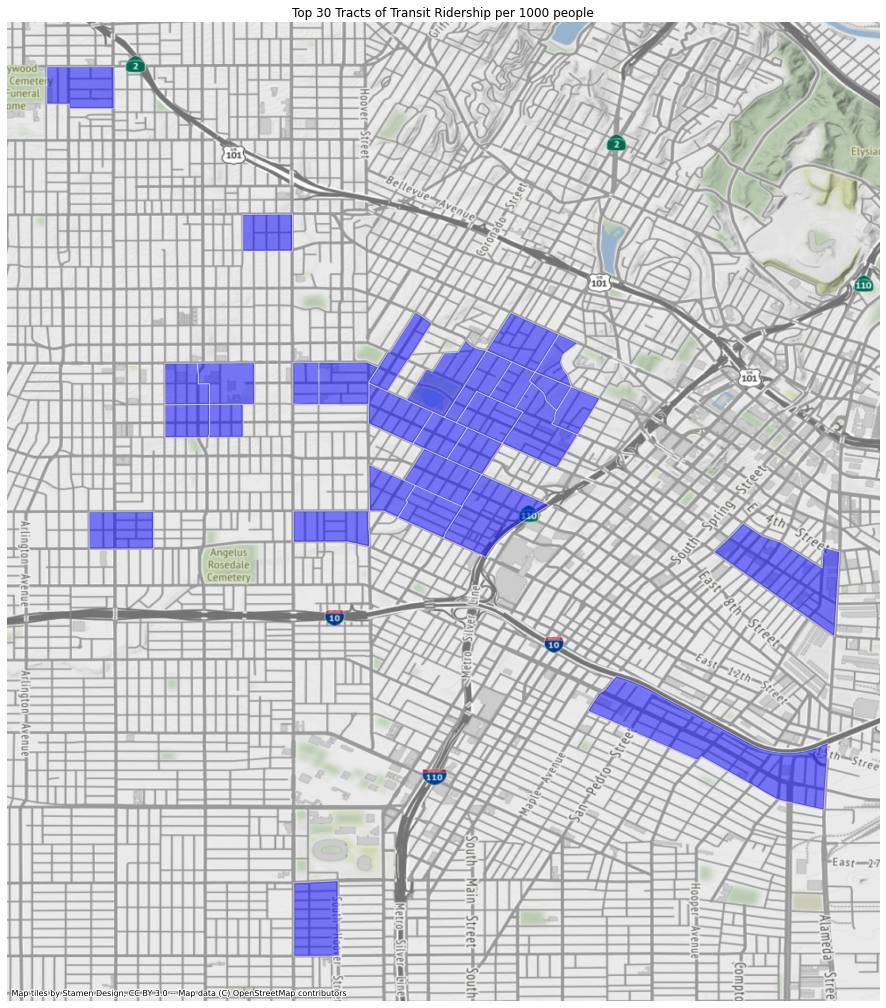

In [17]:
fig,ax = plt.subplots(figsize=(20,18))
gdf.sort_values(by='transit_per_1000',ascending=False)[:30].plot(ax=ax,
                                                                 color='blue',
                                                                 edgecolor='white',
                                                                 alpha=0.5,legend=True)


# title
ax.set_title('Top 30 Tracts of Transit Ridership per 1000 people')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string())

I changed the contexuality input that we were using from class as that wasn't showing anything. I think there may be an issue with projecting my data to a CRS, but am not entirely sure.

Top 30 tracts are in the Central LA. It looks like mostly Westlake with some scattering around the edges. It's noticable that these areas are presenting themselves as clusters, with one mega-cluster in Westlake.

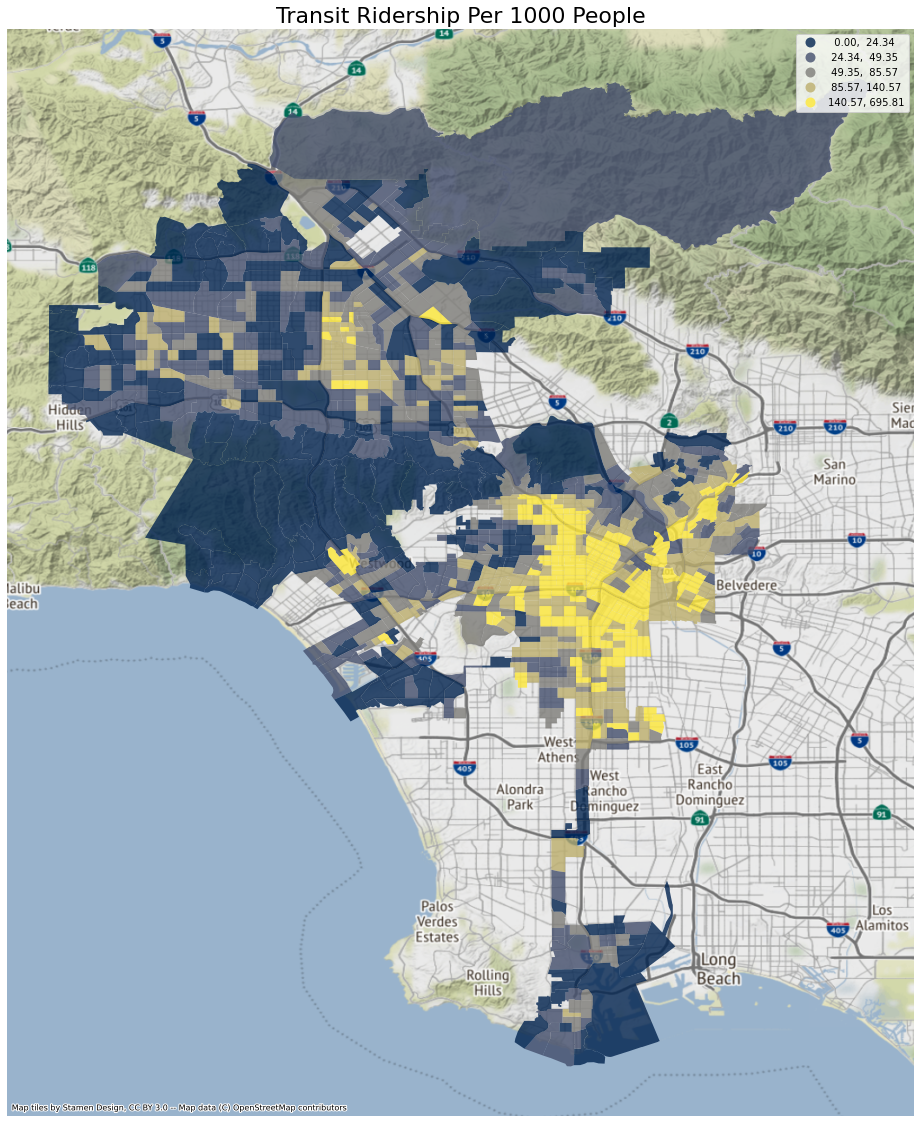

In [18]:
fig,ax = plt.subplots(figsize=(20,20))

gdf.plot(ax=ax,
        column='transit_per_1000',
        legend=True,
        alpha=0.8,
        cmap='cividis',
        scheme='quantiles')

ax.axis('off')
ax.set_title('Transit Ridership Per 1000 People',fontsize=22) #font size! Well hot dog. Going to be using this for the next week
ctx.add_basemap(ax, crs=gdf.crs.to_string())

Okay, really want to get my bus stop data to work now, I think that would be helpful. Still having trouble with the data itself.

But the story: High transit use in Central LA and South LA and moderate usage on the Westside and the San Fernando Valley. This presents a new persective my adding normalizing the data per 1000 people, which in effect is a different way to present percentages. Still interesting to see. I'm curious what the lag data will show. 

# Global Spaitial Autocorrelation or Something Like That

So I'm using K to count the number of nearest neighbors. When we eventually get down to some of the mapping and charts, I think seeing clusters of transit will provide some insights, but am stil worried about using just the one combined dataset I have-- as it feels "flat."

In [19]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(gdf,k=8)

# Row-standardization
wq.transform = 'r'

Woo! Something happened. 

Doing stuff with spatial lag. Kind of exciting to see what happens with this. 

Moved down to just the one variable to make sure I get this right. But creating a new variable

In [20]:
gdf['transit_per_1000_lag'] = lps.weights.lag_spatial(wq, gdf['transit_per_1000'])

In [21]:
gdf.sample(10)[['Total Work','Neighborhood','Public transportation','transit_per_1000','transit_per_1000_lag']]

Total Work         Neighborhood  Public transportation  transit_per_1000  \
247      2678.0         Sherman Oaks                   61.0         22.778193   
11       2556.0              Sunland                   74.0         28.951487   
172      2081.0      North Hollywood                  150.0         72.080730   
573      1091.0           Pico-Union                  365.0        334.555454   
803      2818.0  Broadway-Manchester                  257.0         91.199432   
180      2077.0          Valley Glen                  121.0         58.257102   
732      3266.0       Vermont Square                  450.0        137.783221   
357      2129.0           Eagle Rock                  136.0         63.879756   
262      2858.0          Lake Balboa                   33.0         11.546536   
449      2409.0            Larchmont                  251.0        104.192611   

     transit_per_1000_lag  
247             33.001752  
11              17.107694  
172             73.970393  
573            374.281769  
803            117.557139  
180             71.934180  
732            162.842540  
357             48.536897  
262             46.160417  
449            181.314855

Oh! This is what I was expecting and I'm also surprised. There will be a couple layers to unpack here in a bit. Excited to move on.

## DONUT and DONUT HOLE TIME (down with diamonds!)

Going to try and identify some donuts and donut holes. 

In [22]:
gdf['transit_lag_diff'] = gdf['transit_per_1000'] - gdf['transit_per_1000_lag']

In [23]:
gdf.sort_values(by='transit_lag_diff')

Geoid                                   Name  \
566   14000US06037209200     Census Tract 2092, Los Angeles, CA   
547   14000US06037208000     Census Tract 2080, Los Angeles, CA   
577   14000US06037211120  Census Tract 2111.20, Los Angeles, CA   
545   14000US06037207710  Census Tract 2077.10, Los Angeles, CA   
450   14000US06037192510  Census Tract 1925.10, Los Angeles, CA   
...                  ...                                    ...   
995   14000US06037980020  Census Tract 9800.20, Los Angeles, CA   
997   14000US06037980022  Census Tract 9800.22, Los Angeles, CA   
998   14000US06037980023  Census Tract 9800.23, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   

              Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
566               Westlake     54894.0      2600.0     1436.0       1135.0   
547              Echo Park     37330.0      3362.0     2654.0       2246.0   
577              Koreatown     52342.0      3237.0     2426.0       1905.0   
545               Downtown    100972.0      3094.0     1334.0       1219.0   
450         East Hollywood     49464.0      1861.0     1617.0       1489.0   
...                    ...         ...         ...        ...          ...   
995           Shadow Hills         NaN         0.0        0.0          0.0   
997          Granada Hills         NaN         0.0        0.0          0.0   
998   Chatsworth Reservoir         NaN         0.0        0.0          0.0   
1001           Westchester         NaN         0.0        0.0          0.0   
1003       No Neighborhood         NaN         0.0        0.0          0.0   

      Carpooled  Public transportation    Bus  ...  %Hispanic or Latino  \
566       301.0                  300.0  157.0  ...                34.35   
547       408.0                  185.0  185.0  ...                63.49   
577       521.0                  415.0  326.0  ...                28.71   
545       115.0                  355.0  201.0  ...                13.95   
450       128.0                  136.0  136.0  ...                52.32   
...         ...                    ...    ...  ...                  ...   
995         0.0                    0.0    0.0  ...                  NaN   
997         0.0                    0.0    0.0  ...                  NaN   
998         0.0                    0.0    0.0  ...                  NaN   
1001        0.0                    0.0    0.0  ...                  NaN   
1003        0.0                    0.0    0.0  ...                  NaN   

                                               geometry  car_per_1000  \
566   POLYGON ((-118.26582 34.05149, -118.26533 34.0...    552.307692   
547   POLYGON ((-118.26117 34.05904, -118.26097 34.0...    789.411065   
577   POLYGON ((-118.29166 34.06905, -118.28950 34.0...    749.459376   
545   POLYGON ((-118.27275 34.04276, -118.27257 34.0...    431.157078   
450   POLYGON ((-118.30916 34.07988, -118.30915 34.0...    868.887695   
...                                                 ...           ...   
995   POLYGON ((-118.34412 34.21700, -118.34389 34.2...           NaN   
997   POLYGON ((-118.50266 34.30809, -118.50265 34.3...           NaN   
998   POLYGON ((-118.64870 34.23120, -118.64803 34.2...           NaN   
1001  POLYGON ((-118.45246 33.94315, -118.44644 33.9...           NaN   
1003  POLYGON ((-118.63598 34.03255, -118.63259 34.0...           NaN   

      transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
566         115.384615     60.384615        55.000000          0.000000   
547          55.026770     55.026770         0.000000          0.000000   
577         128.205128    100.710534        27.494594          0.000000   
545         114.738203     64.964447        26.502909          5.494505   
450          73.078990     73.078990         0.000000          0.000000   
...                ...           ...             

Well that query wasn't too helpful and I'm definately not going to check out the whole dataset. Though myabe it's time to check out what this means for our selected neighborhoods.

* Downtown (Central LA)
* Pico-Union(Central LA)
* Panaroma City (San Fernando Valley)
* North Hollywood (San Fernando Valley)
* Mid-City (Central LA, Car Dominant)

In [24]:
gdf.query("Neighborhood== 'Downtown'").sort_values(by='transit_lag_diff')

Geoid                                   Name Neighborhood  \
545  14000US06037207710  Census Tract 2077.10, Los Angeles, CA     Downtown   
546  14000US06037207900     Census Tract 2079, Los Angeles, CA     Downtown   
542  14000US06037207400     Census Tract 2074, Los Angeles, CA     Downtown   
532  14000US06037206031  Census Tract 2060.31, Los Angeles, CA     Downtown   
544  14000US06037207502  Census Tract 2075.02, Los Angeles, CA     Downtown   
702  14000US06037226002  Census Tract 2260.02, Los Angeles, CA     Downtown   
543  14000US06037207501  Census Tract 2075.01, Los Angeles, CA     Downtown   
541  14000US06037207302  Census Tract 2073.02, Los Angeles, CA     Downtown   
537  14000US06037207101  Census Tract 2071.01, Los Angeles, CA     Downtown   
535  14000US06037206200     Census Tract 2062, Los Angeles, CA     Downtown   
540  14000US06037207301  Census Tract 2073.01, Los Angeles, CA     Downtown   
692  14000US06037224010  Census Tract 2240.10, Los Angeles, CA     Downtown   
701  14000US06037226001  Census Tract 2260.01, Los Angeles, CA     Downtown   
536  14000US06037206300     Census Tract 2063, Los Angeles, CA     Downtown   

     Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
545    100972.0      3094.0     1334.0       1219.0      115.0   
546     92104.0      4535.0     2670.0       2415.0      255.0   
542     87000.0       473.0      337.0        300.0       37.0   
532     99205.0      3078.0     1867.0       1599.0      268.0   
544     18594.0      1144.0      455.0        424.0       31.0   
702     37643.0      1179.0      485.0        434.0       51.0   
543     60625.0      1404.0      739.0        655.0       84.0   
541     39972.0      3021.0     1634.0       1574.0       60.0   
537     39063.0      1654.0     1186.0       1094.0       92.0   
535     23515.0      1708.0      947.0        898.0       49.0   
540     51667.0      3224.0     1168.0       1138.0       30.0   
692     28082.0      1593.0      733.0        577.0      156.0   
701     34808.0      1190.0      484.0        406.0       78.0   
536      9191.0       850.0      131.0        100.0       31.0   

     Public transportation    Bus  ...  %Hispanic or Latino  \
545                  355.0  201.0  ...                13.95   
546                  329.0  195.0  ...                28.97   
542                   16.0    6.0  ...                44.64   
532                  393.0  208.0  ...                14.48   
544                   86.0   25.0  ...                 5.89   
702                  169.0  125.0  ...                43.57   
543                  123.0   46.0  ...                21.39   
541                  399.0  201.0  ...                18.16   
537                  140.0  109.0  ...                14.21   
535                  352.0  177.0  ...                16.97   
540                  758.0  534.0  ...                18.92   
692                  518.0  432.0  ...                57.61   
701                  399.0  390.0  ...                83.71   
536                  447.0  447.0  ...                15.65   

                                              geometry  car_per_1000  \
545  POLYGON ((-118.27275 34.04276, -118.27257 34.0...    431.157078   
546  POLYGON ((-118.26801 34.04065, -118.26744 34.0...    588.754135   
542  POLYGON ((-118.25317 34.05879, -118.25298 34.0...    712.473573   
532  POLYGON ((-118.23971 34.01489, -118.23970 34.0...    606.562703   
544  POLYGON ((-118.25855 34.05308, -118.25833 34.0...    397.727273   
702  POLYGON ((-118.25987 34.03129, -118.25977 34.0...    411.365564   
543  POLYGON ((-118.25566 34.05638, -118.25538 34.0...    526.353276   
541  POLYGON ((-118.25201 34.04483, -118.25174 34.0...    540.880503   
537  POLYGON ((-118.24882 34.06251, -118.24874 34.0...    717.049577   
535  POLYGON ((-118.24696 34.04668, -118.24618 34.0...    554.449649   
540  POLYGON ((-118.25713 34.04302, -118.25579 34.0...    362.282878   
692  POLYGON ((-118.27388 34.03

Obvisouly these are all in one neighborhood, but I will be interested to see how they spatailly related to each other. There is a pretty significant range in transit lag differnces.

In [25]:
gdf.query("Neighborhood== 'Pico-Union'").sort_values(by='transit_lag_diff')

Geoid                                   Name Neighborhood  \
575  14000US06037210010  Census Tract 2100.10, Los Angeles, CA   Pico-Union   
695  14000US06037224310  Census Tract 2243.10, Los Angeles, CA   Pico-Union   
618  14000US06037213310  Census Tract 2133.10, Los Angeles, CA   Pico-Union   
619  14000US06037213320  Census Tract 2133.20, Los Angeles, CA   Pico-Union   
573  14000US06037209810  Census Tract 2098.10, Los Angeles, CA   Pico-Union   
621  14000US06037213402  Census Tract 2134.02, Los Angeles, CA   Pico-Union   
680  14000US06037221602  Census Tract 2216.02, Los Angeles, CA   Pico-Union   
572  14000US06037209520  Census Tract 2095.20, Los Angeles, CA   Pico-Union   
670  14000US06037221120  Census Tract 2211.20, Los Angeles, CA   Pico-Union   
696  14000US06037224320  Census Tract 2243.20, Los Angeles, CA   Pico-Union   
694  14000US06037224200     Census Tract 2242, Los Angeles, CA   Pico-Union   
574  14000US06037209820  Census Tract 2098.20, Los Angeles, CA   Pico-Union   
672  14000US06037221220  Census Tract 2212.20, Los Angeles, CA   Pico-Union   
669  14000US06037221110  Census Tract 2211.10, Los Angeles, CA   Pico-Union   

     Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
575     31712.0      1944.0      886.0        631.0      255.0   
695     36932.0      1147.0      683.0        595.0       88.0   
618     48333.0      1909.0     1293.0       1130.0      163.0   
619     26759.0      1417.0      914.0        885.0       29.0   
573     30373.0      1091.0      478.0        338.0      140.0   
621     42766.0      2328.0     1543.0       1377.0      166.0   
680     36008.0      1321.0      938.0        832.0      106.0   
572     33168.0      1387.0      655.0        494.0      161.0   
670     38060.0      1635.0     1065.0        869.0      196.0   
696     28616.0      1485.0      883.0        575.0      308.0   
694     31996.0      1243.0      644.0        583.0       61.0   
574     31289.0      1353.0      656.0        542.0      114.0   
672     43611.0      1825.0     1153.0        960.0      193.0   
669     34868.0      1733.0      976.0        866.0      110.0   

     Public transportation    Bus  ...  %Hispanic or Latino  \
575                  729.0  709.0  ...                85.65   
695                  285.0  270.0  ...                89.68   
618                  425.0  425.0  ...                64.34   
619                  315.0  302.0  ...                64.56   
573                  365.0  365.0  ...                71.05   
621                  564.0  519.0  ...                68.25   
680                  255.0  255.0  ...                84.09   
572                  580.0  534.0  ...                88.52   
670                  388.0  388.0  ...                96.03   
696                  385.0  385.0  ...                83.78   
694                  385.0  371.0  ...                90.30   
574                  520.0  517.0  ...                91.25   
672                  503.0  503.0  ...                88.30   
669                  648.0  617.0  ...                92.79   

                                              geometry  car_per_1000  \
575  POLYGON ((-118.27667 34.04519, -118.27650 34.0...    455.761317   
695  POLYGON ((-118.28423 34.04712, -118.28413 34.0...    595.466434   
618  POLYGON ((-118.30026 34.05325, -118.30007 34.0...    677.317968   
619  POLYGON ((-118.29579 34.04736, -118.29579 34.0...    645.024700   
573  POLYGON ((-118.28419 34.05180, -118.28399 34.0...    438.130156   
621  POLYGON ((-118.29161 34.05254, -118.29141 34.0...    662.800687   
680  POLYGON ((-118.30035 34.03997, -118.29836 34.0...    710.068130   
572  POLYGON ((-118.27984 34.05172, -118.27878 34.0...    472.242249   
670  POLYGON ((-118.29159 34.04424, -118.29043 34.0...    651.376147   
696  POLYGON ((-118.28410 34.03986, -118.28386 34.0...    594.612795   
694  POLYGON ((-118.28182 34.03748, -118.28168 34.0...    518.101368   
574  POLYGON ((-118.28040 34.04

Range is not quite as large as Downtown, but still significant.

In [26]:
gdf.query("Neighborhood== 'Panorama City'").sort_values(by='transit_lag_diff')

Geoid                                   Name   Neighborhood  \
148  14000US06037120108  Census Tract 1201.08, Los Angeles, CA  Panorama City   
140  14000US06037120010  Census Tract 1200.10, Los Angeles, CA  Panorama City   
134  14000US06037119341  Census Tract 1193.41, Los Angeles, CA  Panorama City   
149  14000US06037120300     Census Tract 1203, Los Angeles, CA  Panorama City   
132  14000US06037119320  Census Tract 1193.20, Los Angeles, CA  Panorama City   
145  14000US06037120105  Census Tract 1201.05, Los Angeles, CA  Panorama City   
139  14000US06037119900     Census Tract 1199, Los Angeles, CA  Panorama City   
144  14000US06037120104  Census Tract 1201.04, Los Angeles, CA  Panorama City   
141  14000US06037120020  Census Tract 1200.20, Los Angeles, CA  Panorama City   
150  14000US06037120400     Census Tract 1204, Los Angeles, CA  Panorama City   
147  14000US06037120107  Census Tract 1201.07, Los Angeles, CA  Panorama City   
131  14000US06037119310  Census Tract 1193.10, Los Angeles, CA  Panorama City   
135  14000US06037119342  Census Tract 1193.42, Los Angeles, CA  Panorama City   
137  14000US06037119700     Census Tract 1197, Los Angeles, CA  Panorama City   
146  14000US06037120106  Census Tract 1201.06, Los Angeles, CA  Panorama City   
133  14000US06037119340  Census Tract 1193.40, Los Angeles, CA  Panorama City   
142  14000US06037120030  Census Tract 1200.30, Los Angeles, CA  Panorama City   
143  14000US06037120103  Census Tract 1201.03, Los Angeles, CA  Panorama City   

     Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
148     39032.0      2302.0     2016.0       1744.0      272.0   
140     49432.0      1431.0     1219.0       1079.0      140.0   
134     51083.0      1411.0     1206.0        972.0      234.0   
149     70208.0      2683.0     2441.0       2227.0      214.0   
132     72813.0      2734.0     2370.0       2084.0      286.0   
145     33984.0      1251.0     1079.0        942.0      137.0   
139     78000.0      2684.0     2184.0       1863.0      321.0   
144     38672.0      1178.0      897.0        786.0      111.0   
141     37045.0      1819.0     1315.0       1026.0      289.0   
150     54733.0      3315.0     3035.0       2678.0      357.0   
147     30481.0      1561.0     1148.0       1008.0      140.0   
131     47959.0      2122.0     1911.0       1730.0      181.0   
135     58611.0      1455.0     1251.0       1068.0      183.0   
137     81688.0      2513.0     2246.0       1797.0      449.0   
146     36217.0      2152.0     1476.0       1231.0      245.0   
133     30817.0      1805.0     1203.0        953.0      250.0   
142     30625.0      1187.0      800.0        613.0      187.0   
143     26875.0      1290.0      827.0        615.0      212.0   

     Public transportation    Bus  ...  %Hispanic or Latino  \
148                  114.0  114.0  ...                82.92   
140                  139.0  134.0  ...                73.41   
134                   87.0   80.0  ...                53.98   
149                  142.0  123.0  ...                63.82   
132                  163.0  163.0  ...                69.83   
145                   93.0   93.0  ...                76.02   
139                  189.0  181.0  ...                67.23   
144                  158.0  154.0  ...                64.95   
141                  240.0  219.0  ...                73.58   
150                   96.0   96.0  ...                57.13   
147                  200.0  200.0  ...                87.26   
131                  142.0  122.0  ...                65.72   
135                  140.0  135.0  ...                77.26   
137                  129.0  122.0  ...                46.63   
146                  437.0  437.0  ...                80.50   
133                  371.0  367.0  ...                93.79   
142                  277.0  267.0  ...                87.85   
143                  309.0  309.0  ...                93.74   

                         

Panorama City range is actually similar to Pico-Union, which I do find suprising. Excited to plot these soon and see their spatial relation>

In [27]:
gdf.query("Neighborhood== 'North Hollywood'").sort_values(by='transit_lag_diff')

Geoid                                   Name  \
207  14000US06037125310  Census Tract 1253.10, Los Angeles, CA   
193  14000US06037124104  Census Tract 1241.04, Los Angeles, CA   
195  14000US06037124201  Census Tract 1242.01, Los Angeles, CA   
189  14000US06037123902  Census Tract 1239.02, Los Angeles, CA   
191  14000US06037124102  Census Tract 1241.02, Los Angeles, CA   
175  14000US06037123205  Census Tract 1232.05, Los Angeles, CA   
210  14000US06037125402  Census Tract 1254.02, Los Angeles, CA   
171  14000US06037123103  Census Tract 1231.03, Los Angeles, CA   
172  14000US06037123104  Census Tract 1231.04, Los Angeles, CA   
196  14000US06037124203  Census Tract 1242.03, Los Angeles, CA   
211  14000US06037125501  Census Tract 1255.01, Los Angeles, CA   
174  14000US06037123204  Census Tract 1232.04, Los Angeles, CA   
209  14000US06037125401  Census Tract 1254.01, Los Angeles, CA   
177  14000US06037123301  Census Tract 1233.01, Los Angeles, CA   
198  14000US06037124300     Census Tract 1243, Los Angeles, CA   
192  14000US06037124103  Census Tract 1241.03, Los Angeles, CA   
176  14000US06037123206  Census Tract 1232.06, Los Angeles, CA   
194  14000US06037124105  Census Tract 1241.05, Los Angeles, CA   
173  14000US06037123203  Census Tract 1232.03, Los Angeles, CA   
197  14000US06037124204  Census Tract 1242.04, Los Angeles, CA   
188  14000US06037123901  Census Tract 1239.01, Los Angeles, CA   
208  14000US06037125320  Census Tract 1253.20, Los Angeles, CA   

        Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
207  North Hollywood     48958.0      2417.0     1922.0       1857.0   
193  North Hollywood     43816.0      1286.0     1052.0        967.0   
195  North Hollywood     64364.0      1744.0     1574.0       1207.0   
189  North Hollywood     70592.0      1309.0     1184.0       1131.0   
191  North Hollywood     50064.0      2014.0     1631.0       1368.0   
175  North Hollywood     46083.0      1210.0      981.0        829.0   
210  North Hollywood     80299.0      3110.0     2649.0       2521.0   
171  North Hollywood     48902.0      1915.0     1613.0       1510.0   
172  North Hollywood     41766.0      2081.0     1744.0       1568.0   
196  North Hollywood     52561.0      1152.0      927.0        814.0   
211  North Hollywood     46767.0      2091.0     1695.0       1581.0   
174  North Hollywood     41375.0      1550.0     1343.0       1216.0   
209  North Hollywood     62934.0      3443.0     2775.0       2681.0   
177  North Hollywood     57031.0      2638.0     2210.0       1949.0   
198  North Hollywood     42826.0      1307.0     1036.0        957.0   
192  North Hollywood     43787.0       877.0      766.0        654.0   
176  North Hollywood     32266.0      1185.0      996.0        924.0   
194  North Hollywood     45764.0      1244.0     1016.0        970.0   
173  North Hollywood     48850.0      1680.0     1387.0       1338.0   
197  North Hollywood     43385.0      1169.0      903.0        863.0   
188  North Hollywood     66771.0      2514.0     1914.0       1695.0   
208  North Hollywood     39977.0      3054.0     2254.0       2168.0   

     Carpooled  Public transportation    Bus  ...  %Hispanic or Latino  \
207       65.0                   36.0    2.0  ...                40.76   
193       85.0                   34.0   23.0  ...                59.11   
195      367.0                   86.0   21.0  ...                61.44   
189       53.0                   53.0   26.0  ...                28.60   
191      263.0                   89.0   34.0  ...                50.80   
175      152.0                   86.0   76.0  ...                75.92   
210      128.0                  154.0  107.0  ...                17.00   
171      103.0                  141.0  141.0  ...                54.39   
172      176.0                  150.0  140.0  ...                61.21   
196      113.0                   88.0   47.0  ...                56.92   
211      114.0              

Less transit lag differences that are positive, but can be expected given this neighborhood is in the San Fernando Valley.

In [28]:
gdf.query("Neighborhood== 'Mid-City'").sort_values(by='transit_lag_diff')

Geoid                                   Name Neighborhood  \
642  14000US06037216900     Census Tract 2169, Los Angeles, CA     Mid-City   
886  14000US06037270300     Census Tract 2703, Los Angeles, CA     Mid-City   
877  14000US06037269700     Census Tract 2697, Los Angeles, CA     Mid-City   
654  14000US06037218600     Census Tract 2186, Los Angeles, CA     Mid-City   
876  14000US06037269602  Census Tract 2696.02, Los Angeles, CA     Mid-City   
651  14000US06037218300     Census Tract 2183, Los Angeles, CA     Mid-City   
640  14000US06037216700     Census Tract 2167, Los Angeles, CA     Mid-City   
653  14000US06037218500     Census Tract 2185, Los Angeles, CA     Mid-City   
650  14000US06037218220  Census Tract 2182.20, Los Angeles, CA     Mid-City   
652  14000US06037218400     Census Tract 2184, Los Angeles, CA     Mid-City   
649  14000US06037218210  Census Tract 2182.10, Los Angeles, CA     Mid-City   
655  14000US06037218701  Census Tract 2187.01, Los Angeles, CA     Mid-City   
885  14000US06037270200     Census Tract 2702, Los Angeles, CA     Mid-City   
875  14000US06037269601  Census Tract 2696.01, Los Angeles, CA     Mid-City   

     Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
642     89547.0      2931.0     2435.0       2164.0      271.0   
886     74323.0      1331.0     1156.0       1020.0      136.0   
877     89450.0      2118.0     1821.0       1729.0       92.0   
654     51604.0      1704.0     1390.0       1314.0       76.0   
876     58668.0      1774.0     1487.0       1396.0       91.0   
651     53621.0      2710.0     2311.0       2135.0      176.0   
640     79730.0      2359.0     1971.0       1857.0      114.0   
653     44872.0      1320.0     1062.0       1013.0       49.0   
650     49632.0      2137.0     1665.0       1583.0       82.0   
652     64018.0      2298.0     1861.0       1609.0      252.0   
649     35436.0      1966.0     1463.0       1356.0      107.0   
655     49316.0      1105.0      797.0        774.0       23.0   
885     67516.0      1935.0     1504.0       1381.0      123.0   
875     53664.0      1759.0     1448.0       1343.0      105.0   

     Public transportation    Bus  ...  %Hispanic or Latino  \
642                   43.0    4.0  ...                16.84   
886                   58.0   42.0  ...                35.13   
877                   92.0   63.0  ...                32.04   
654                  163.0  163.0  ...                56.67   
876                   80.0   74.0  ...                34.69   
651                  233.0  221.0  ...                51.74   
640                  133.0  124.0  ...                22.32   
653                  134.0  117.0  ...                57.14   
650                  239.0  239.0  ...                51.00   
652                  208.0  200.0  ...                62.42   
649                  243.0  229.0  ...                68.72   
655                  168.0  162.0  ...                31.41   
885                  265.0  215.0  ...                52.42   
875                  242.0  238.0  ...                58.94   

                                              geometry  car_per_1000  \
642  POLYGON ((-118.36812 34.04554, -118.36810 34.0...    830.774480   
886  POLYGON ((-118.37749 34.03702, -118.37746 34.0...    868.519910   
877  POLYGON ((-118.39390 34.03314, -118.39338 34.0...    859.773371   
654  POLYGON ((-118.34804 34.03511, -118.34739 34.0...    815.727700   
876  POLYGON ((-118.38730 34.04228, -118.38659 34.0...    838.218715   
651  POLYGON ((-118.36574 34.03632, -118.36473 34.0...    852.767528   
640  POLYGON ((-118.37680 34.04471, -118.37677 34.0...    835.523527   
653  POLYGON ((-118.35566 34.03402, -118.35562 34.0...    804.545455   
650  POLYGON ((-118.34079 34.04576, -118.34045 34.0...    779.129621   
652  POLYGON ((-118.36859 34.03496, -118.36829 34.0...    809.834639   
649  POLYGON ((-118.34599 34.04118, -118.34563 34.0...    744.150560   
655  POLYGON ((-118.34002 34.03

Again, seems similar to Pico-Union and Panorama City. Maybe these patterns are indicative of neighborhoods in general, or at least neighborhoods with marginally more transit ridership.

In [29]:
gdf_donut = gdf.sort_values(by='transit_lag_diff').head(5)
gdf_donut

Geoid                                   Name  \
566  14000US06037209200     Census Tract 2092, Los Angeles, CA   
547  14000US06037208000     Census Tract 2080, Los Angeles, CA   
577  14000US06037211120  Census Tract 2111.20, Los Angeles, CA   
545  14000US06037207710  Census Tract 2077.10, Los Angeles, CA   
450  14000US06037192510  Census Tract 1925.10, Los Angeles, CA   

       Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
566        Westlake     54894.0      2600.0     1436.0       1135.0   
547       Echo Park     37330.0      3362.0     2654.0       2246.0   
577       Koreatown     52342.0      3237.0     2426.0       1905.0   
545        Downtown    100972.0      3094.0     1334.0       1219.0   
450  East Hollywood     49464.0      1861.0     1617.0       1489.0   

     Carpooled  Public transportation    Bus  ...  %Hispanic or Latino  \
566      301.0                  300.0  157.0  ...                34.35   
547      408.0                  185.0  185.0  ...                63.49   
577      521.0                  415.0  326.0  ...                28.71   
545      115.0                  355.0  201.0  ...                13.95   
450      128.0                  136.0  136.0  ...                52.32   

                                              geometry  car_per_1000  \
566  POLYGON ((-118.26582 34.05149, -118.26533 34.0...    552.307692   
547  POLYGON ((-118.26117 34.05904, -118.26097 34.0...    789.411065   
577  POLYGON ((-118.29166 34.06905, -118.28950 34.0...    749.459376   
545  POLYGON ((-118.27275 34.04276, -118.27257 34.0...    431.157078   
450  POLYGON ((-118.30916 34.07988, -118.30915 34.0...    868.887695   

     transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
566        115.384615     60.384615        55.000000          0.000000   
547         55.026770     55.026770         0.000000          0.000000   
577        128.205128    100.710534        27.494594          0.000000   
545        114.738203     64.964447        26.502909          5.494505   
450         73.078990     73.078990         0.000000          0.000000   

     lightrail_per_1000  transit_per_1000_lag  transit_lag_diff  
566           67.692308            303.533235       -188.148620  
547           42.831648            222.962271       -167.935501  
577           26.567810            288.208950       -160.003822  
545          124.111183            272.826780       -158.088577  
450           44.599678            230.682694       -157.603704  

[5 rows x 45 columns]

In [30]:
# hashtag-donut holes for the win
gdf_donuthole = gdf.sort_values(by='transit_lag_diff').tail(28)
gdf_donuthole

Geoid                                   Name  \
4     14000US06037101300     Census Tract 1013, Los Angeles, CA   
5     14000US06037101400     Census Tract 1014, Los Angeles, CA   
14    14000US06037103400     Census Tract 1034, Los Angeles, CA   
47    14000US06037106510  Census Tract 1065.10, Los Angeles, CA   
49    14000US06037106603  Census Tract 1066.03, Los Angeles, CA   
50    14000US06037106604  Census Tract 1066.04, Los Angeles, CA   
51    14000US06037106641  Census Tract 1066.41, Los Angeles, CA   
52    14000US06037106642  Census Tract 1066.42, Los Angeles, CA   
54    14000US06037106645  Census Tract 1066.45, Los Angeles, CA   
55    14000US06037106646  Census Tract 1066.46, Los Angeles, CA   
87    14000US06037113211  Census Tract 1132.11, Los Angeles, CA   
90    14000US06037113231  Census Tract 1132.31, Los Angeles, CA   
91    14000US06037113232  Census Tract 1132.32, Los Angeles, CA   
94    14000US06037113235  Census Tract 1132.35, Los Angeles, CA   
95    14000US06037113237  Census Tract 1132.37, Los Angeles, CA   
276   14000US06037134302  Census Tract 1343.02, Los Angeles, CA   
283   14000US06037134423  Census Tract 1344.23, Los Angeles, CA   
284   14000US06037134424  Census Tract 1344.24, Los Angeles, CA   
929   14000US06037276603  Census Tract 2766.03, Los Angeles, CA   
930   14000US06037276604  Census Tract 2766.04, Los Angeles, CA   
933   14000US06037277200     Census Tract 2772, Los Angeles, CA   
934   14000US06037277400     Census Tract 2774, Los Angeles, CA   
935   14000US06037278001  Census Tract 2780.01, Los Angeles, CA   
995   14000US06037980020  Census Tract 9800.20, Los Angeles, CA   
997   14000US06037980022  Census Tract 9800.22, Los Angeles, CA   
998   14000US06037980023  Census Tract 9800.23, Los Angeles, CA   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA   

              Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
4                  Tujunga     81776.0      1782.0     1538.0       1457.0   
5                  Tujunga     75139.0      1553.0     1392.0       1139.0   
14                 Sunland     89926.0      3207.0     2932.0       2572.0   
47                  Sylmar     85521.0      2547.0     2166.0       1869.0   
49           Granada Hills    112404.0      1515.0     1380.0       1231.0   
50                  Sylmar     60350.0      2164.0     1972.0       1724.0   
51           Granada Hills    110357.0      1145.0      898.0        752.0   
52           Granada Hills    109063.0      1363.0     1232.0       1203.0   
54           Granada Hills    113940.0      1605.0     1439.0       1321.0   
55           Granada Hills    110734.0      1430.0     1269.0       1170.0   
87              Chatsworth     91094.0      2027.0     1625.0       1459.0   
90              West Hills    112500.0      1026.0      895.0        844.0   
91              West Hills    113079.0      2058.0     1763.0       1671.0   
94              Chatsworth     89792.0       955.0      801.0        675.0   
95              Chatsworth     82024.0      1924.0     1585.0       1439.0   
276             West Hills    103750.0      2176.0     2031.0       1817.0   
283             West Hills    100950.0      1625.0     1299.0       1129.0   
284             Chatsworth    147679.0      1356.0     1118.0       1040.0   
929          Playa del Rey     90375.0      3571.0     3188.0       3005.0   
930            Westchester     93525.0      2894.0     2636.0       2395.0   
933            Westchester     60179.0      1251.0     1119.0       1056.0   
934            Westchester     43264.0       395.0      355.0        346.0   
935            Westchester    109468.0      1475.0     1174.0       1114.0   
995           Shadow Hills         NaN         0.0        0.0          0.0   
997          Granada Hills         NaN         0.0        0.0          0.0   
998   Chatsworth Reservoir         NaN         

So the last 28 tracts have NaN values. I wonder if that's becasue trasnit ridership in these areas is so small. I thought they would show up as negative values, so I'm a little confused in what's happening here. 

* Note: The maps below all have the wrong column value `transit_lag_diff` so changed those to `transit_per_1000_lag`
    #thanksYoh

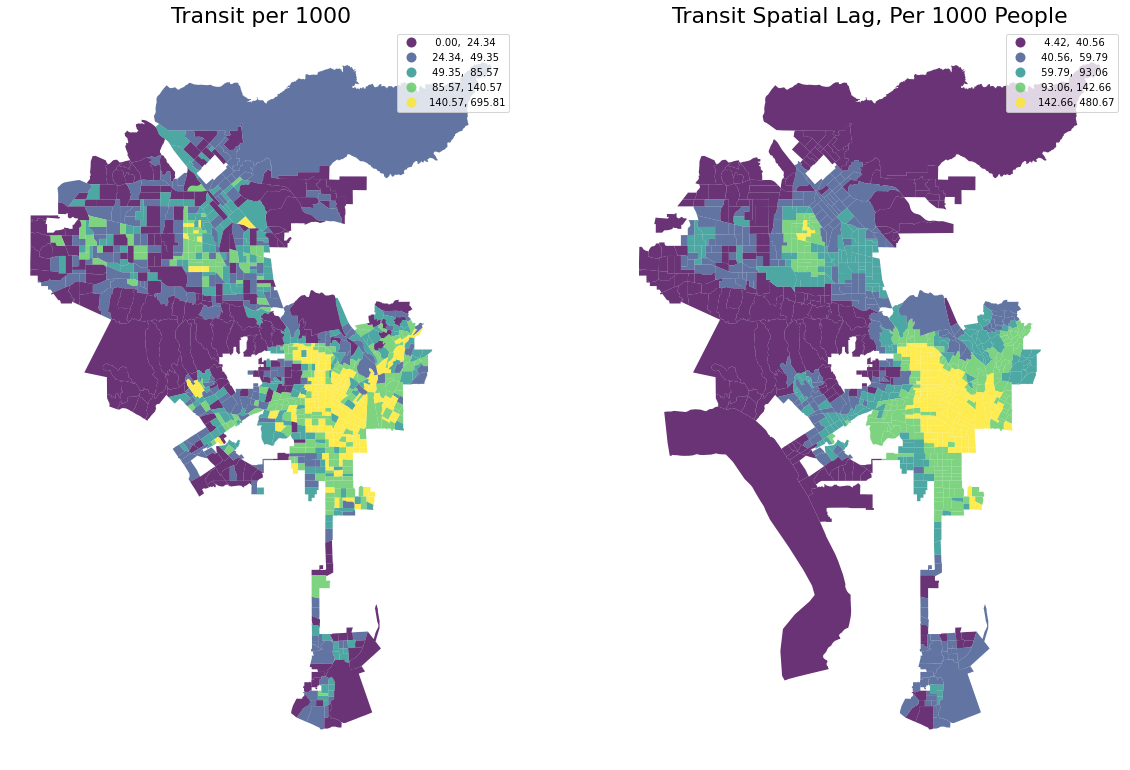

In [31]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
gdf.plot(ax=ax[0], # this assigns the map to the left subplot
         column='transit_per_1000', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.8, 
         legend=True,)


ax[0].axis("off")
ax[0].set_title("Transit per 1000",fontsize=22)

# spatial lag map on the right
gdf.plot(ax=ax[1],
         column='transit_per_1000_lag',
         scheme='quantiles',
         k=5, 
         edgecolor='white',
         linewidth=0, 
         alpha=0.8,
         legend=True,)


ax[1].axis("off")
ax[1].set_title('Transit Spatial Lag, Per 1000 People',fontsize=22)

plt.show()

So, I defintaly spend too much time exploring different color options. It's JUST SO FUN. 

I'm also not delving into donut and donut holes as I would like, but need to be a bit more efficient with my time (or at least try to).

There is a much more clear picture now. Strong clusterings in Central LA and the SF Valley. Moderate use in West LA and even some in west SF Valley--all these being relative given low trasnit numbers in general.

Mapping the Neighborhoods
* Downtown (Central LA)
* Pico-Union(Central LA)
* Panoroma City (San Fernando Valley)
* North Hollywood (San Fernando Valley)
* Mid-City (Central LA, Car Dominant)

In order to save on memory and successfully save this file,the below maps are disabled--I added a # to the first run line of code

Downtown

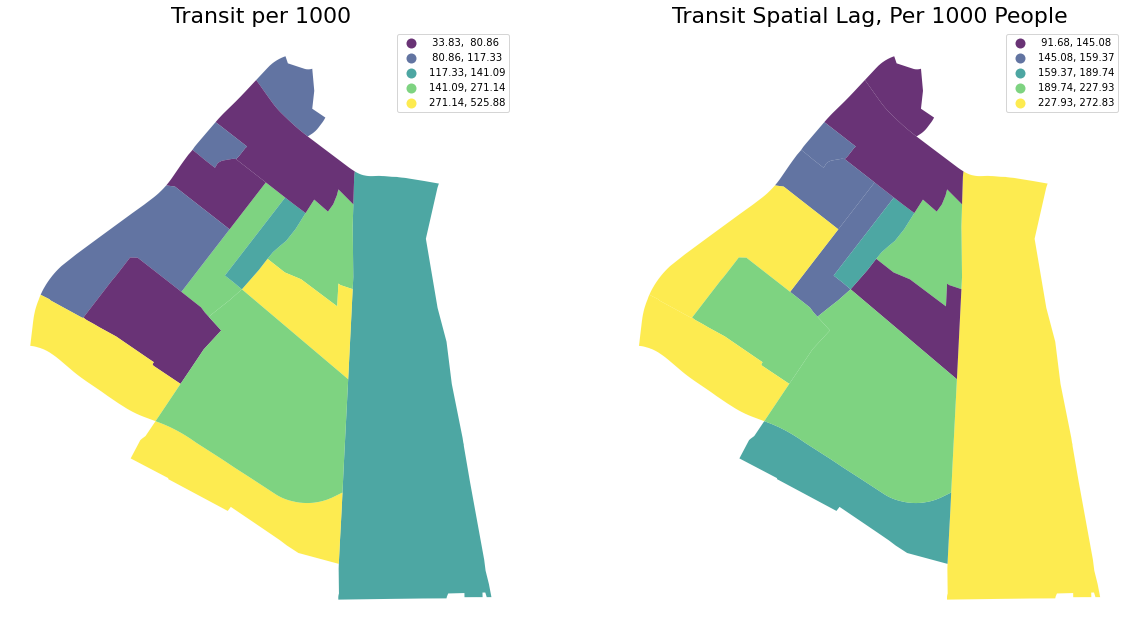

In [32]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
gdf.query("Neighborhood== 'Downtown'").plot(ax=ax[0], # this assigns the map to the left subplot
         column='transit_per_1000', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.8, 
         legend=True,)


ax[0].axis("off")
ax[0].set_title("Transit per 1000",fontsize=22)

# spatial lag map on the right
gdf.query("Neighborhood== 'Downtown'").plot(ax=ax[1],
         column='transit_per_1000_lag',
         scheme='quantiles',
         k=5, 
         edgecolor='white',
         linewidth=0, 
         alpha=0.8,
         legend=True,)


ax[1].axis("off")
ax[1].set_title('Transit Spatial Lag, Per 1000 People',fontsize=22)

plt.show()

* Numbers significantly reduced
* Other tracts not on this neighborhood are likely influencing this the boundaries of each neighborhood.
* Auto travel of neighboring tracts are likely influencing these numbers
* Ultimately, surprising to see how trasnit lag numbers on this "high transit" area, though since its' LA, maybe not so surprising. I also think looking on a finer detail would help--block groups


Pico-Union

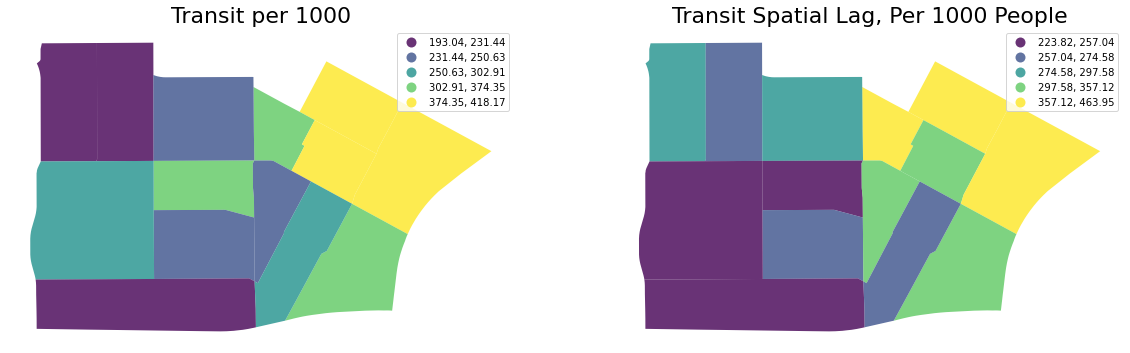

In [33]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
gdf.query("Neighborhood== 'Pico-Union'").plot(ax=ax[0], # this assigns the map to the left subplot
         column='transit_per_1000', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.8, 
         legend=True,)


ax[0].axis("off")
ax[0].set_title("Transit per 1000",fontsize=22)

# spatial lag map on the right
gdf.query("Neighborhood== 'Pico-Union'").plot(ax=ax[1],
         column='transit_per_1000_lag',
         scheme='quantiles',
         k=5, 
         edgecolor='white',
         linewidth=0, 
         alpha=0.8,
         legend=True,)


ax[1].axis("off")
ax[1].set_title('Transit Spatial Lag, Per 1000 People',fontsize=22)

plt.show()

So be warned, I'm imaging all of these maps are likely going to say the same thing, more or less. These other neighborhoods will have significantly less transit compared to Downtown.
* It would be helpful to see what neighborhoods surround Pico-Union.
* Auto travel of neighboring tracts are likely influencing these numbers
* Most of these look fairly uniform


Panorama City

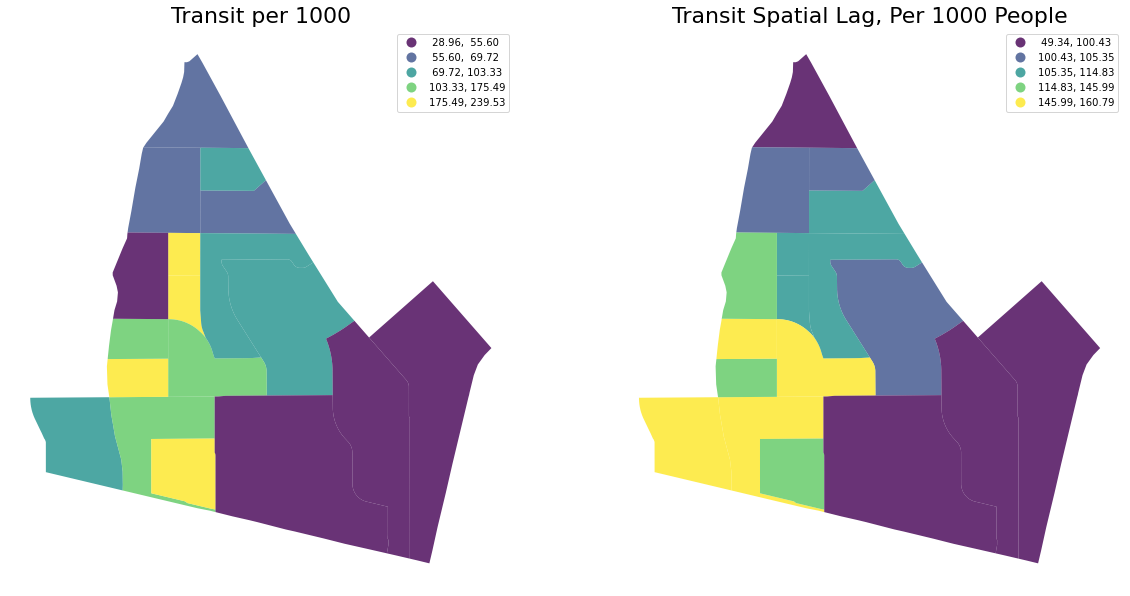

In [34]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 15))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
gdf.query("Neighborhood== 'Panorama City'").plot(ax=ax[0], # this assigns the map to the left subplot
         column='transit_per_1000', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.8, 
         legend=True,)


ax[0].axis("off")
ax[0].set_title("Transit per 1000",fontsize=22)

# spatial lag map on the right
gdf.query("Neighborhood== 'Panorama City'").plot(ax=ax[1],
         column='transit_per_1000_lag',
         scheme='quantiles',
         k=5, 
         edgecolor='white',
         linewidth=0, 
         alpha=0.8,
         legend=True,)


ax[1].axis("off")
ax[1].set_title('Transit Spatial Lag, Per 1000 People',fontsize=22)

plt.show()

* Numbers reduced, more tracts are in the "positive", I should look at their total populations. This is surprising given this neighborhood’s location in the San Fernando Valley
* It would be helpful to see what neighborhoods surround Panorama City.
* Auto travel of neighboring tracts are likely influencing these numbers


North Hollywod

In [35]:
# create the 1x2 subplots
#fig, ax = plt.subplots(1, 2, figsize=(20, 15))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
#gdf.query("Neighborhood== 'North Hollywood'").plot(ax=ax[0], # this assigns the map to the left subplot
       #  column='transit_per_1000', 
      #   scheme='quantiles',
     #    k=5, 
    #     edgecolor='white', 
   #      linewidth=0, 
  #       alpha=0.8, 
 #        legend=True,)


#ax[0].axis("off")
#ax[0].set_title("Transit per 1000",fontsize=22)

# spatial lag map on the right
#gdf.query("Neighborhood== 'North Hollywood'").plot(ax=ax[1],
        # column='transit_per_1000_lag',
       #  scheme='quantiles',
      #   k=5, 
     #    edgecolor='white',
    #     linewidth=0, 
  ##       alpha=0.8,
 #        legend=True,)


#ax[1].axis("off")
#ax[1].set_title('Transit Spatial Lag, Per 1000 People',fontsize=22)

#plt.show()

So these maps are practically identical, with some slight changes
* Again, more tracts in the positive
* That is unique from what I've seen here. There are some nuances to this, but something I was not expecting.
* Interval ranges are also much more condensed compared to the others

Mid-City (Not running map in order to save room to save)

In [36]:
# create the 1x2 subplots
#fig, ax = plt.subplots(1, 2, figsize=(20, 15))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
#gdf.query("Neighborhood== 'Mid-City'").plot(ax=ax[0], # this assigns the map to the left subplot
       #  column='transit_per_1000', 
      #   scheme='quantiles',
      #   k=5, 
       #  edgecolor='white', 
       #  linewidth=0, 
        # alpha=0.8, 
         #legend=True,)
#

#ax[0].axis("off")
#ax[0].set_title("Transit per 1000",fontsize=22)

# spatial lag map on the right
#gdf.query("Neighborhood== 'Mid-City'").plot(ax=ax[1],
        # column='transit_per_1000_lag',
       #  scheme='quantiles',
       #  k=5, 
        # edgecolor='white',
        # linewidth=0, 
        # alpha=0.8,
        # legend=True,)


#ax[1].axis("off")
#ax[1].set_title('Transit Spatial Lag, Per 1000 People',fontsize=22)

#plt.show()

* Again, almost identical.
* Numbers are compressed. Downtown appears to have the biggest range of trasnit numbers.

# Query for neighborhoods of focus

Adding a query for jsut the 5 nbhoods so I can overlay some neighborhood boundary lines in the below maps.

In [37]:
nbhoods=gdf[(gdf['Neighborhood']=='Downtown')|(gdf['Neighborhood']=='Pico-Union')|(gdf['Neighborhood']=='Mid-City')|(gdf['Neighborhood']=='Panorama City')|(gdf['Neighborhood']=='North Hollywood')]


In [38]:
nbhoods.head(3)

Geoid                                   Name   Neighborhood  \
131  14000US06037119310  Census Tract 1193.10, Los Angeles, CA  Panorama City   
132  14000US06037119320  Census Tract 1193.20, Los Angeles, CA  Panorama City   
133  14000US06037119340  Census Tract 1193.40, Los Angeles, CA  Panorama City   

     Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
131     47959.0      2122.0     1911.0       1730.0      181.0   
132     72813.0      2734.0     2370.0       2084.0      286.0   
133     30817.0      1805.0     1203.0        953.0      250.0   

     Public transportation    Bus  ...  %Hispanic or Latino  \
131                  142.0  122.0  ...                65.72   
132                  163.0  163.0  ...                69.83   
133                  371.0  367.0  ...                93.79   

                                              geometry  car_per_1000  \
131  POLYGON ((-118.45609 34.24271, -118.45578 34.2...    900.565504   
132  POLYGON ((-118.45772 34.23549, -118.45766 34.2...    866.861741   
133  POLYGON ((-118.45355 34.23315, -118.45355 34.2...    666.481994   

     transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
131         66.918002     57.492931         0.000000          9.425071   
132         59.619605     59.619605         0.000000          0.000000   
133        205.540166    203.324100         2.216066          0.000000   

     lightrail_per_1000  transit_per_1000_lag  transit_lag_diff  
131            8.011310             81.619885        -14.701884  
132           36.576445            105.165532        -45.545927  
133           18.836565            105.393017        100.147149  

[3 rows x 45 columns]

# Moran

This part I'm again not condifent in. Will follow Yoh's notebook for guidance and see what we can find.

Restarting some steps removing NaN values from the dataset. I'm dropping these values, which I realize is a drastic option. I'm also trying some options like a trimmed dataset or just excluding them.

In [39]:
gdf2=gdf

In [40]:
gdf2.sample(5)

Geoid                                   Name   Neighborhood  \
348  14000US06037143604  Census Tract 1436.04, Los Angeles, CA    Studio City   
271  14000US06037134002  Census Tract 1340.02, Los Angeles, CA       Winnetka   
953  14000US06037294200     Census Tract 2942, Los Angeles, CA     Wilmington   
873  14000US06037269300     Census Tract 2693, Los Angeles, CA  Cheviot Hills   
952  14000US06037294120  Census Tract 2941.20, Los Angeles, CA     Wilmington   

     Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
348     82199.0      2492.0     1825.0       1666.0      159.0   
271     54138.0      1784.0     1531.0       1316.0      215.0   
953     70272.0      2301.0     2190.0       1895.0      295.0   
873    165208.0      1920.0     1438.0       1406.0       32.0   
952     57159.0      1003.0      919.0        801.0      118.0   

     Public transportation   Bus  ...  %Hispanic or Latino  \
348                  219.0  60.0  ...                 6.61   
271                   55.0  55.0  ...                51.51   
953                   15.0  15.0  ...                87.63   
873                   47.0  11.0  ...                 3.80   
952                   47.0  47.0  ...                92.52   

                                              geometry  car_per_1000  \
348  POLYGON ((-118.37896 34.14096, -118.37846 34.1...    732.343499   
271  POLYGON ((-118.58848 34.20831, -118.58793 34.2...    858.183857   
953  POLYGON ((-118.27529 33.79863, -118.27523 33.7...    951.760104   
873  POLYGON ((-118.42465 34.04194, -118.42375 34.0...    748.958333   
952  POLYGON ((-118.25659 33.79954, -118.25463 33.7...    916.251246   

     transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
348         87.881220     24.077047        60.593900          3.210273   
271         30.829596     30.829596         0.000000          0.000000   
953          6.518905      6.518905         0.000000          0.000000   
873         24.479167      5.729167        15.104167          0.000000   
952         46.859422     46.859422         0.000000          0.000000   

     lightrail_per_1000  transit_per_1000_lag  transit_lag_diff  
348           89.085072             46.892496         40.988724  
271           73.991031             84.952855        -54.123259  
953           26.075619             48.039109        -41.520204  
873          175.520833             52.579311        -28.100144  
952           10.967099             30.226760         16.632661  

[5 rows x 45 columns]

In [41]:
gdf2=gdf.drop([1003, 1001, 998, 997, 995])

In [42]:
gdf2.sort_values(by='transit_per_1000').head()

Geoid                                   Name  \
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   
831   14000US06037262303  Census Tract 2623.03, Los Angeles, CA   
936   14000US06037278102  Census Tract 2781.02, Los Angeles, CA   
205   14000US06037125100     Census Tract 1251, Los Angeles, CA   
328   14000US06037139801  Census Tract 1398.01, Los Angeles, CA   

        Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
1002       San Pedro         NaN        24.0       15.0         15.0   
831        Brentwood    250001.0      1282.0      994.0        863.0   
936    Playa del Rey    148182.0      1898.0     1556.0       1486.0   
205   Valley Village     76595.0      3215.0     2933.0       2773.0   
328          Tarzana    157557.0      1621.0     1356.0       1286.0   

      Carpooled  Public transportation  Bus  ...  %Hispanic or Latino  \
1002        0.0                    0.0  0.0  ...                32.94   
831       131.0                    0.0  0.0  ...                 2.67   
936        70.0                    0.0  0.0  ...                13.02   
205       160.0                    0.0  0.0  ...                20.18   
328        70.0                    0.0  0.0  ...                 6.05   

                                               geometry  car_per_1000  \
1002  POLYGON ((-118.29105 33.75378, -118.29050 33.7...    625.000000   
831   POLYGON ((-118.49599 34.07105, -118.49597 34.0...    775.351014   
936   POLYGON ((-118.46224 33.95961, -118.46214 33.9...    819.810327   
205   POLYGON ((-118.39650 34.17214, -118.39541 34.1...    912.286159   
328   POLYGON ((-118.55665 34.14637, -118.55664 34.1...    836.520666   

      transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
1002               0.0           0.0              0.0               0.0   
831                0.0           0.0              0.0               0.0   
936                0.0           0.0              0.0               0.0   
205                0.0           0.0              0.0               0.0   
328                0.0           0.0              0.0               0.0   

      lightrail_per_1000  transit_per_1000_lag  transit_lag_diff  
1002            0.000000             57.372422        -57.372422  
831           202.028081             25.577186        -25.577186  
936           140.147524             18.154816        -18.154816  
205            67.807154             54.385372        -54.385372  
328           106.724244             39.081228        -39.081228  

[5 rows x 45 columns]

In [43]:
gdf2.sort_values(by='transit_per_1000').tail()

Geoid                                   Name Neighborhood  \
563  14000US06037209102  Census Tract 2091.02, Los Angeles, CA     Westlake   
536  14000US06037206300     Census Tract 2063, Los Angeles, CA     Downtown   
562  14000US06037208904  Census Tract 2089.04, Los Angeles, CA     Westlake   
560  14000US06037208902  Census Tract 2089.02, Los Angeles, CA     Westlake   
569  14000US06037209402  Census Tract 2094.02, Los Angeles, CA     Westlake   

     Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
563     29190.0      2995.0     1148.0       1071.0       77.0   
536      9191.0       850.0      131.0        100.0       31.0   
562     27250.0      1996.0      467.0        363.0      104.0   
560     34568.0      1478.0      379.0        243.0      136.0   
569     32879.0      2219.0      453.0        226.0      227.0   

     Public transportation     Bus  ...  %Hispanic or Latino  \
563                 1551.0  1488.0  ...                71.43   
536                  447.0   447.0  ...                15.65   
562                 1136.0  1125.0  ...                88.59   
560                  859.0   836.0  ...                90.60   
569                 1544.0  1510.0  ...                89.05   

                                              geometry  car_per_1000  \
563  POLYGON ((-118.27065 34.05464, -118.27041 34.0...    383.305509   
536  POLYGON ((-118.25041 34.04326, -118.24900 34.0...    154.117647   
562  POLYGON ((-118.27185 34.05934, -118.27130 34.0...    233.967936   
560  POLYGON ((-118.27468 34.05739, -118.27363 34.0...    256.427605   
569  POLYGON ((-118.27988 34.05388, -118.27974 34.0...    204.146012   

     transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
563        517.863105    496.828047        19.365609          1.669449   
536        525.882353    525.882353         0.000000          0.000000   
562        569.138277    563.627255         0.000000          5.511022   
560        581.190798    565.629229        15.561570          0.000000   
569        695.808923    680.486706         0.000000          0.000000   

     lightrail_per_1000  transit_per_1000_lag  transit_lag_diff  
563           22.036728            423.838771         94.024334  
536           64.705882            128.230822        397.651531  
562           34.569138            463.440250        105.698027  
560           15.561570            480.669120        100.521678  
569           15.772871            434.674339        261.134584  

[5 rows x 45 columns]

In [44]:
gdf2.reset_index()

index               Geoid                                   Name  \
0        0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
1        1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
2        2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
3        3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA   
4        4  14000US06037101300     Census Tract 1013, Los Angeles, CA   
..     ...                 ...                                    ...   
994    994  14000US06037980019  Census Tract 9800.19, Los Angeles, CA   
995    996  14000US06037980021  Census Tract 9800.21, Los Angeles, CA   
996    999  14000US06037980024  Census Tract 9800.24, Los Angeles, CA   
997   1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA   
998   1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA   

          Neighborhood  Median Inc  Total Work  Car Total  Drove alone  \
0              Tujunga     63534.0      2027.0     1860.0       1656.0   
1              Tujunga     90389.0      1834.0     1730.0       1617.0   
2              Tujunga     44083.0      3057.0     2699.0       2430.0   
3              Tujunga     43713.0      1593.0     1439.0       1323.0   
4              Tujunga     81776.0      1782.0     1538.0       1457.0   
..                 ...         ...         ...        ...          ...   
994  Pacific Palisades    231250.0        67.0       50.0         50.0   
995         Hansen Dam         NaN        18.0       18.0         18.0   
996    Sepulveda Basin    150250.0       138.0      130.0        130.0   
997            Tujunga         NaN         5.0        5.0          5.0   
998          San Pedro         NaN        24.0       15.0         15.0   

     Carpooled  Public transportation  ...  %Hispanic or Latino  \
0        204.0                   59.0  ...                27.74   
1        113.0                    9.0  ...                 4.32   
2        269.0                   68.0  ...                41.22   
3        116.0                   48.0  ...                36.84   
4         81.0                   26.0  ...                 7.65   
..         ...                    ...  ...                  ...   
994        0.0                    0.0  ...                 0.00   
995        0.0                    0.0  ...                45.45   
996        0.0                    0.0  ...                24.22   
997        0.0                    0.0  ...                26.92   
998        0.0                    0.0  ...                32.94   

                                              geometry  car_per_1000  \
0    POLYGON ((-118.30229 34.25870, -118.30091 34.2...    917.612235   
1    POLYGON ((-118.30334 34.27371, -118.30330 34.2...    943.293348   
2    POLYGON ((-118.29945 34.25598, -118.29792 34.2...    882.891724   
3    POLYGON ((-118.28593 34.25227, -118.28592 34.2...    903.327056   
4    POLYGON ((-118.27822 34.25068, -118.27822 34.2...    863.075196   
..                                                 ...           ...   
994  POLYGON ((-118.59919 34.07436, -118.59918 34.0...    746.268657   
995  POLYGON ((-118.40183 34.26509, -118.40178 34.2...   1000.000000   
996  POLYGON ((-118.51849 34.18389, -118.51849 34.1...    942.028986   
997  POLYGON ((-118.35173 34.28034, -118.35173 34.2...   1000.000000   
998  POLYGON ((-118.29105 33.75378, -118.29050 33.7...    625.000000   

     transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
0           29.107055     17.760237        11.346818               0.0   
1            4.907306      0.000000         4.907306               0.0   
2           22.244030     22.244030         0.000000               0.0   
3           30.131827     30.131827         0.000000               0.0   
4           14.590348     14.590348         0.000000               0.0   
..                ...           ...              ...               ...   
994          0.000000      0.000000         0.00000

In [45]:
gdf2=gdf2.reset_index()

In [46]:
gdf2.sample()

index               Geoid                                   Name  \
538    538  14000US06037207102  Census Tract 2071.02, Los Angeles, CA   

    Neighborhood  Median Inc  Total Work  Car Total  Drove alone  Carpooled  \
538    Chinatown     30165.0      1170.0      708.0        630.0       78.0   

     Public transportation  ...  %Hispanic or Latino  \
538                  225.0  ...                 22.8   

                                              geometry  car_per_1000  \
538  POLYGON ((-118.24303 34.05735, -118.24296 34.0...    605.128205   

     transit_per_1000  bus_per_1000  subway_per_1000  disrail_per_1000  \
538        192.307692    176.068376        16.239316               0.0   

     lightrail_per_1000  transit_per_1000_lag  transit_lag_diff  
538           41.025641             127.73161         64.576082  

[1 rows x 46 columns]

So we dropped the NaN neighborhoods. I believe that was the crux of our problem, but I'm not entirely sure. 

Help from Yoh here.

In [47]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(gdf2,k=8)

# Row-standardization
wq.transform = 'r'

In [48]:
y = gdf2.transit_per_1000
moran = Moran(y, wq)
moran.I

0.733858509638251

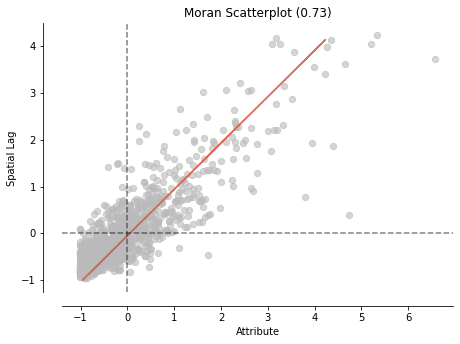

In [49]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

There is a very clear patter pattern here. Though there is huge concentration at 0,0, which I think explains general low public transportation use in LA. Stong clope. 

/opt/conda/lib/python3.8/site-packages/splot/_viz_esda_mpl.py:47: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines['left'].set_smart_bounds(True)
/opt/conda/lib/python3.8/site-packages/splot/_viz_esda_mpl.py:48: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines['bottom'].set_smart_bounds(True)


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7292225e80>)

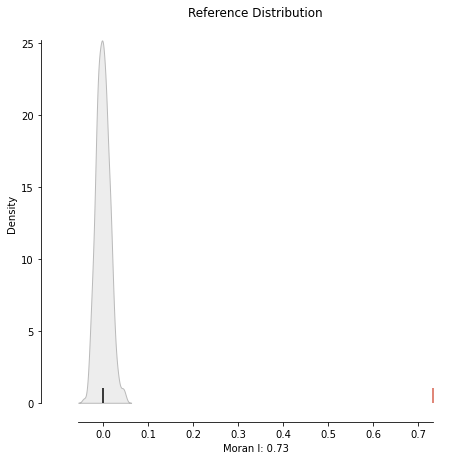

In [50]:
plot_moran_simulation(moran,aspect_equal=False)

In [51]:
moran.p_sim

0.001

 A Moran I score of 0.73 gives a p-value of 0.001. Our chosen alpha is 0.05, thus reject our null hypothesis that our map is random. Public transit use by workers is not random.

Auto-Correlation

In [52]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

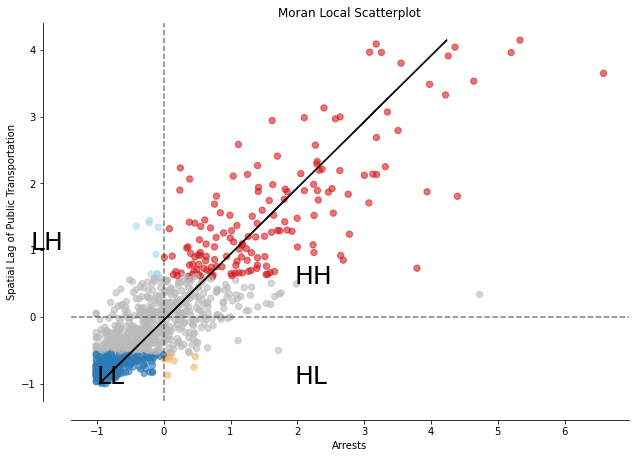

In [53]:
# Plot
fig,ax = plt.subplots(figsize=(10,15))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Arrests")
ax.set_ylabel('Spatial Lag of Public Transportation')

# add some labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

Shows P-values that are less than 0.05--these are statisically significant, spatailly autocorrelated geographies.My assumption is that these will all be in Central LA, few a few scattered elsewhere--SF Valley. I assum the LL points will be in the SF Valley as well and in the harbor region.

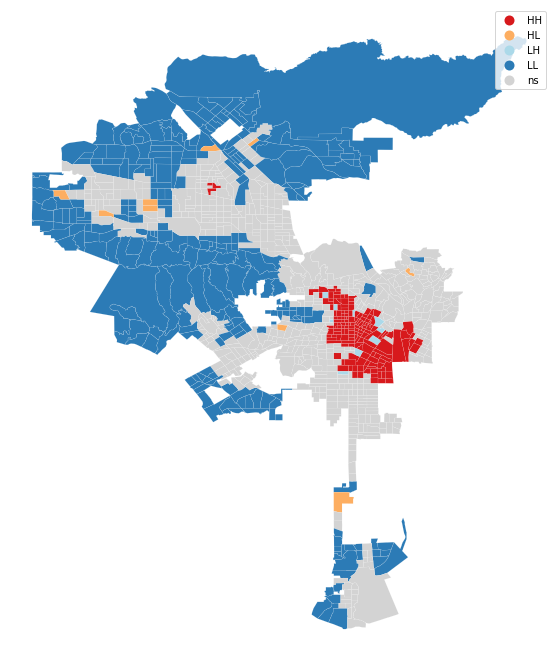

In [54]:
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(lisa, gdf2, p=0.05, ax=ax)
plt.show()

In [55]:
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

No handles with labels found to put in legend.


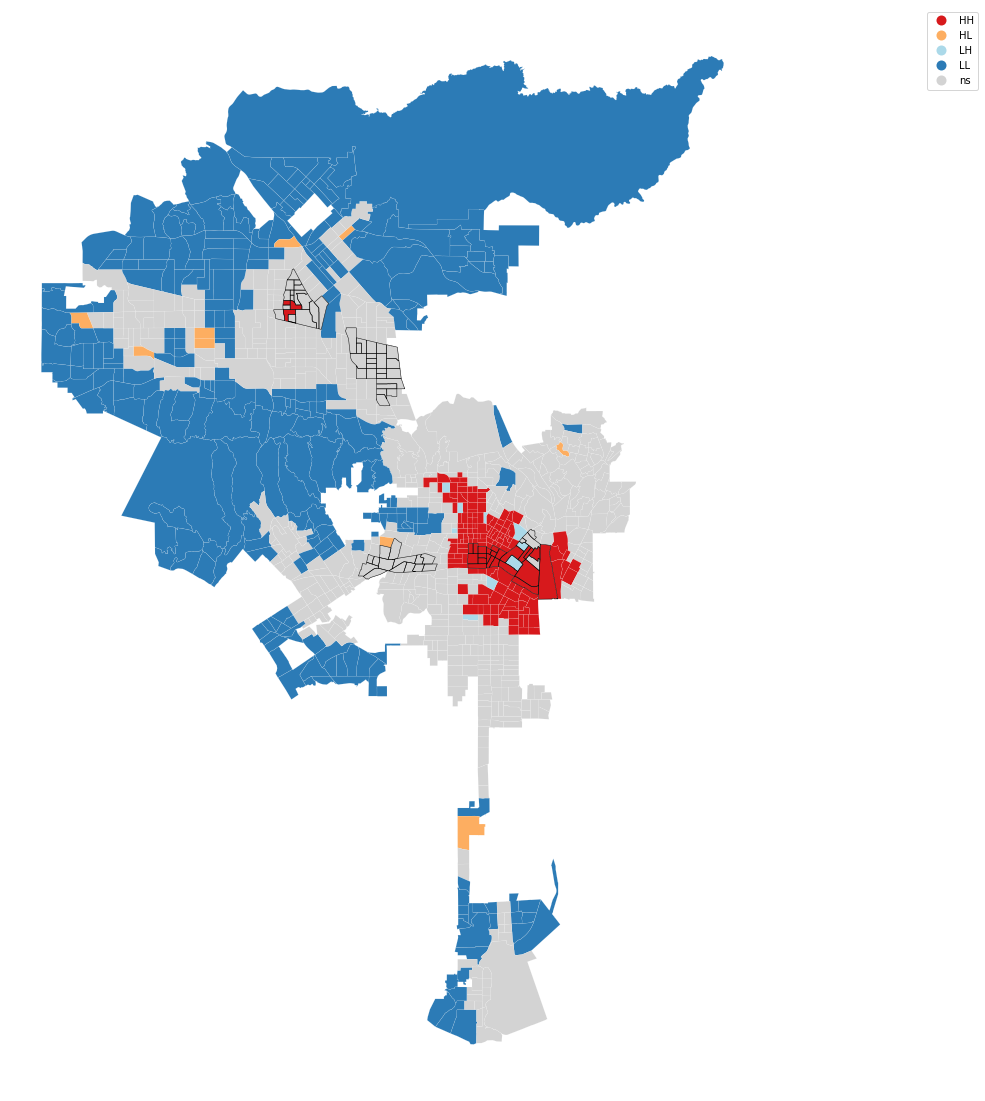

No handles with labels found to put in legend.
/opt/conda/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

In [56]:
fig, ax = plt.subplots(figsize=(25,20))

lisa_cluster(lisa, gdf2, p=0.05, ax=ax, zorder=10, 
             legend=True, legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)})

nbhoods.boundary.plot(ax=ax,color='black',zorder=20,lw=.5)

plt.show()
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

This shows what I assumed would happen, but goes further. I am particularly interested in the HL and LH clusters. What explains the HL on the norwest of the SF Valley? The HH points have statisically confirmed what we know, but narrowed the area in which we thhought are high transit users. 

From 

* HH: high transit rate geographies near other high transit rate tracts
* LL: low transit rate geographies near other low transit rate tracts
* LH (donuts): low transit rate geographies surrounded by high transit tracts
* HL (diamonds): high transit rate geographies surrounded by low transit tracts

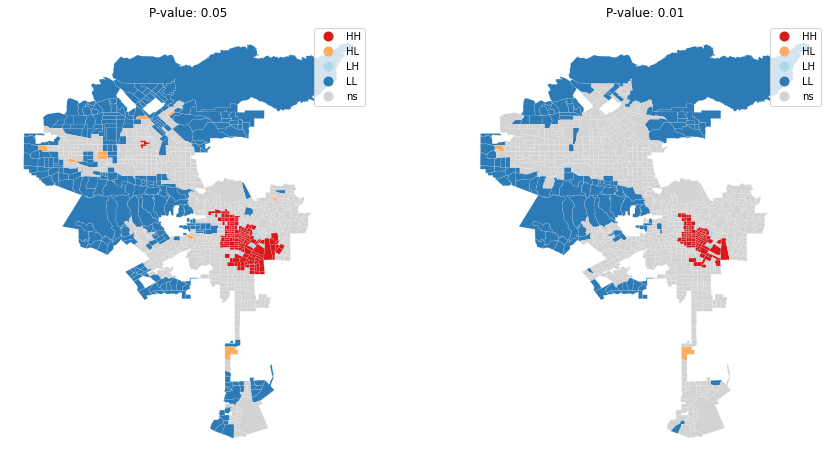

In [57]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# regular count map on the left
lisa_cluster(lisa, gdf2, p=0.05, ax=ax[0])

ax[0].axis("off")
ax[0].set_title("P-value: 0.05")

# spatial lag map on the right
lisa_cluster(lisa, gdf2, p=0.01, ax=ax[1])
ax[1].axis("off")
ax[1].set_title("P-value: 0.01")

plt.show()

If we change our p-value to 0.01, are results are narrowed even further. HH transit areas are only in Central LA, which itself has eroded extensively. In all honesty, I'm surprised that any SF Valley tracts showed up with a p-value of 0.05, but makes me feel better knowing we have a focus in that region in our analysis. I think this adds a new element to what we've done thus far by showing the stasitical signifance of high transit tracts. 

# Division of Labor

Both discussed the process and communicated analysis of data. 

**Andrew:** Prepped the data, provided an added lens to the neighborhoods we're focusing on, relayed info to Ben, AND struggled with Moran.  

**Ben:** Using the same data, also ran tests to explore data and practice skills, provided mores analysis, and also struggled with Moran.  

**Yoh:** Fixed maps and added global autocorrelation to the new dataset so we could run Moran.